# Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

# Import necessary Python Modules

In [235]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso, Ridge, LassoCV, RidgeCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [236]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [238]:
#Data Summary
df.shape

(1000, 40)

In [239]:
df.isnull().sum().sort_values(ascending=False)

_c39                           1000
fraud_reported                    0
incident_date                     0
capital-loss                      0
capital-gains                     0
insured_relationship              0
insured_hobbies                   0
insured_occupation                0
insured_education_level           0
insured_sex                       0
insured_zip                       0
umbrella_limit                    0
policy_annual_premium             0
policy_deductable                 0
policy_csl                        0
policy_state                      0
policy_bind_date                  0
policy_number                     0
age                               0
incident_type                     0
collision_type                    0
incident_severity                 0
police_report_available           0
auto_year                         0
auto_model                        0
auto_make                         0
vehicle_claim                     0
property_claim              

In [ ]:
#all the entries of the column '_c39' are Null and hence we will drop it

In [240]:
#find duplicates
df.duplicated().sum()

0

In [ ]:
#there are no duplicates found

In [241]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

collision_type                  object
incident_date                   object
fraud_reported                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
insured_relationship            object
insured_hobbies                 object
property_damage                 object
insured_occupation              object
insured_education_level         object
police_report_available         object
insured_sex                     object
policy_csl                      object
policy_state                    object
auto_make                       object
auto_model                      object
policy_bind_date                object
incident_type                   object
policy_annual_premium          float64
_c39                           float64
capital-loss                     int64
injury_claim                     int64
age                      

In [242]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print("Min value = ", df[i].min())
    print("Max value =", df[i].max())
    print('*******************************************************')

*******************************************************
Value counts of months_as_customer 

194    8
285    7
140    7
230    7
128    7
254    7
101    7
210    7
156    6
239    6
245    6
289    6
246    6
61     6
255    6
257    6
65     6
147    6
259    6
290    6
222    6
107    6
295    6
163    6
126    6
134    5
108    5
266    5
103    5
269    5
137    5
78     5
286    5
298    5
80     5
284    5
85     5
143    5
186    5
264    5
27     5
253    5
211    5
235    5
165    5
241    5
169    5
130    4
297    4
215    4
212    4
303    4
166    4
204    4
142    4
175    4
124    4
195    4
180    4
123    4
122    4
121    4
328    4
219    4
261    4
160    4
150    4
119    4
152    4
256    4
267    4
270    4
271    4
274    4
276    4
252    4
280    4
154    4
146    4
283    4
233    4
229    4
228    4
225    4
120    4
209    4
84     4
91     4
96     4
64     4
371    4
22     4
32     4
70     4
97     4
41     4
398    4
155    3
446    3
75     3
208    

*******************************************************
*******************************************************
Value counts of incident_hour_of_the_day 

17    54
3     53
0     52
23    51
16    49
4     46
13    46
10    46
6     44
9     43
14    43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64
Min value =  0
Max value = 23
*******************************************************
*******************************************************
Value counts of number_of_vehicles_involved 

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64
Min value =  1
Max value = 4
*******************************************************
*******************************************************
Value counts of property_damage 

?      360
NO     338
YES    302
Name: property_damage, dtype: int64
Min value =  ?
Max value = YES
*************************************

<AxesSubplot:ylabel='collision_type'>

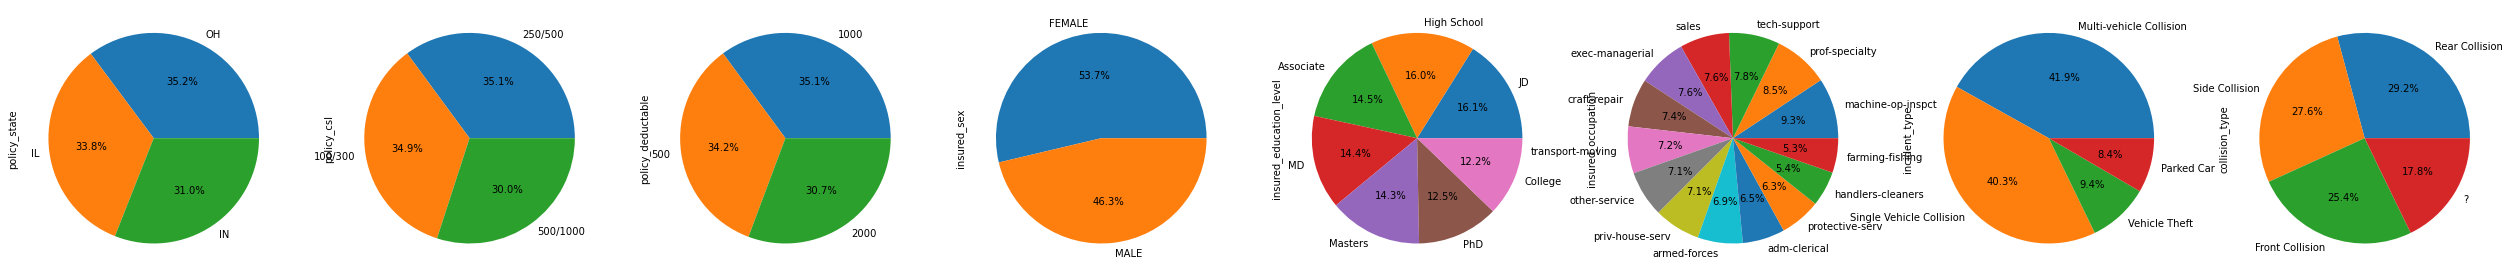

In [243]:
plt.figure(figsize=(50,25))
plt.subplot(1,9,1)
df['policy_state'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,2)
df['policy_csl'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,3)
df['policy_deductable'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,4)
df['insured_sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,5)
df['insured_education_level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,6)
df['insured_occupation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,7)
df['incident_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,8)
df['collision_type'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:ylabel='witnesses'>

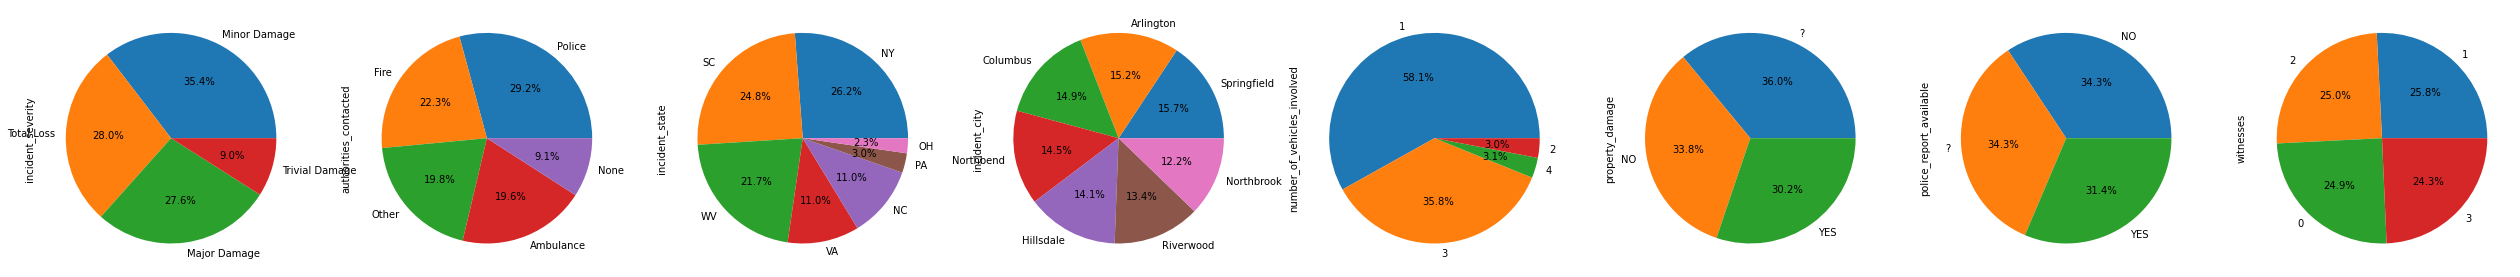

In [244]:
plt.figure(figsize=(50,25))
plt.subplot(1,9,1)
df['incident_severity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,2)
df['authorities_contacted'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,3)
df['incident_state'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,4)
df['incident_city'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,5)
df['number_of_vehicles_involved'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,6)
df['property_damage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,7)
df['police_report_available'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,9,8)
df['witnesses'].value_counts().plot.pie(autopct='%1.1f%%')

N    753
Y    247
Name: fraud_reported, dtype: int64

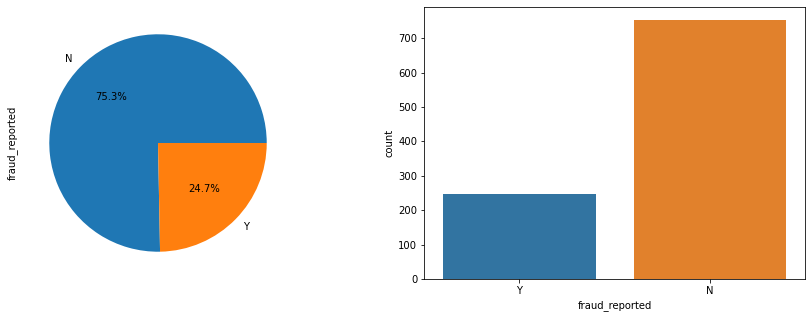

In [245]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['fraud_reported'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['fraud_reported'])
df['fraud_reported'].value_counts()

In [ ]:
# We will now convert the dates into day, month and year columns

# CONVERT COLUMNS DATATYPE:- 

In [246]:
# let's extrat days, month and year from policy bind date

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_year'] = df['policy_bind_date'].dt.year


In [247]:
# extracting days and month from date
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

# DROPPING UNWANTED COLUMNS :- 

In [248]:
df.drop(columns = ['policy_number', '_c39', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_model'], inplace=True, axis=1)

In [249]:
df.shape

(1000, 39)

In [ ]:
# there were 40 columns initially and we added another 5 columns and dropped 6 columns

# REPLACING '?' with 'NaN'

In [250]:
df = df.replace('?', np.NaN)

In [251]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim        

In [ ]:
#now, collision_type , property_damage and police_report_available has null values

# TREATING NULL VALUES :- 

In [252]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.

df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

In [253]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [254]:
# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

In [255]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [256]:
# if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

In [257]:
df.isnull().sum().sum()

0

# ENCODING

In [258]:
#LABEL ENCODING

In [259]:
#Import library:
from sklearn.preprocessing import LabelEncoder
var_mod = ['policy_state', 'insured_sex', 'auto_make', 'police_report_available', 'insured_occupation', 'insured_hobbies', 'fraud_reported', 'insured_relationship', 'incident_type', 'collision_type', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [260]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level         object
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity               object
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

In [261]:
#ORDINAL ENCODING

In [262]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories=[['High School', 'College', 'Masters' , 'PhD', 'Associate', 'MD', 'JD'],['Minor Damage', 'Trivial Damage', 'Major Damage',  'Total Loss']])
df1=ord_enc.fit_transform(df[['insured_education_level','incident_severity']])
df1
df[['insured_education_level', 'incident_severity']]=df1


In [263]:
df['insured_education_level'].value_counts()

6.0    161
0.0    160
4.0    145
5.0    144
2.0    143
3.0    125
1.0    122
Name: insured_education_level, dtype: int64

In [264]:
df['incident_severity'].value_counts()

0.0    354
3.0    280
2.0    276
1.0     90
Name: incident_severity, dtype: int64

In [265]:
df1 = pd.get_dummies(df['policy_csl'], prefix=['policy_csl'])

In [268]:
df = pd.concat([df, df1], axis=1)

In [269]:
df.shape

(1000, 42)

In [ ]:
#added 3 columns after get_dummies encoding

In [270]:
df.drop(columns=['policy_csl'], inplace=True)

In [271]:
df.shape

(1000, 41)

In [272]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_year',
       'fraud_reported', 'policy_bind_month', 'policy_bind_day',
       'policy_bind_year', 'incident_month', 'incident_day',
       '['policy_csl']_100/300', '['policy_csl']_250/500',
       '['policy_csl']_500/1000'],
      dtype='object')

In [273]:
#adding only continous data in a variable & checking their distribution

In [274]:
cont_data = ['months_as_customer', 'age', 'policy_bind_month', 'policy_bind_day', 'policy_bind_year', 'policy_annual_premium', 'insured_zip' , 'capital-gains', 'capital-loss','incident_hour_of_the_day', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

In [275]:
#lets check the statistical description of the each column
pd.set_option("display.max_rows", None, "display.max_columns", None)
df[cont_data].describe(include='all')

,months_as_customer,age,policy_bind_month,policy_bind_day,policy_bind_year,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,6.559000,15.448000,2001.604000,1256.406150,501214.488000,25126.100000,-26793.700000,11.644000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,3.391758,8.850176,7.360391,244.167395,71701.610941,27872.187708,28104.096686,6.951373,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,1.000000,1.000000,1990.000000,433.330000,430104.000000,0.000000,-111100.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,4.000000,8.000000,1995.000000,1089.607500,448404.500000,0.000000,-51500.000000,6.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,7.000000,16.000000,2002.000000,1257.200000,466445.500000,0.000000,-23250.000000,12.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,9.000000,23.000000,2008.000000,1415.695000,603251.000000,51025.000000,0.000000,17.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,12.000000,31.000000,2015.000000,2047.590000,620962.000000,100500.000000,0.000000,23.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
#all the columns have std<mean except capital-gains, capital-loss (hence these 2 columns are skewed)

0    753
1    247
Name: fraud_reported, dtype: int64


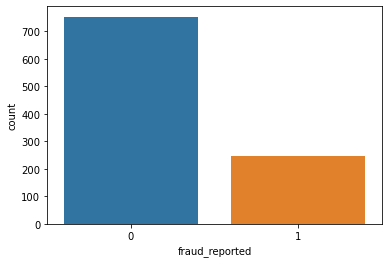

In [277]:
#count of each class (Yes(1) = 247, No(0)=753)
ax=sns.countplot(x="fraud_reported", data=df)
print(df['fraud_reported'].value_counts())

In [278]:
#There is a problem of class imbalance here and hence we would have to either do upsampling or downsampling depending on the size of the dataset.

#Since the amount of upsampling needed would be around 70% we would be better doing downsampling to avoid any foreign data or unwanted data.

# We will peform downsampling at a later stage

# We have an imbalanced data set which we will downsample using SMOTE after the train_test_split

<AxesSubplot:>

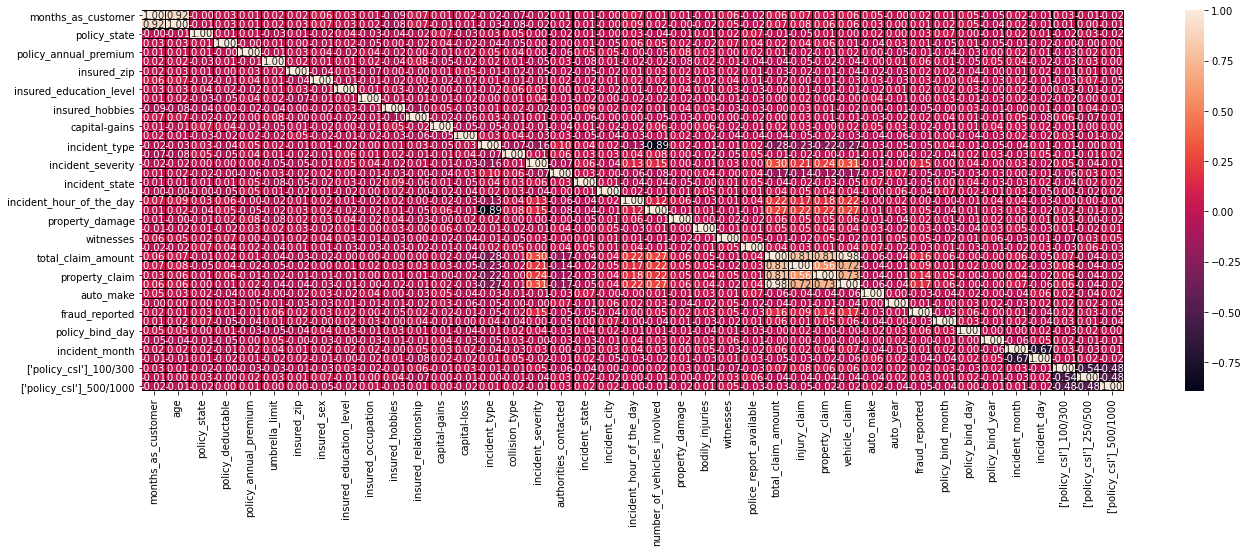

In [280]:
#Correlation using HEATMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [281]:
#Correlation with the target column
corr_mat=np.abs(df.corr())
corr_mat['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
incident_severity              0.154238
property_claim                 0.137835
injury_claim                   0.090975
policy_bind_day                0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
incident_state                 0.051407
incident_type                  0.050376
witnesses                      0.049497
insured_hobbies                0.046838
['policy_csl']_500/1000        0.046045
authorities_contacted          0.045802
incident_day                   0.044151
incident_city                  0.040403
bodily_injuries                0.033877
insured_sex                    0.030873
policy_bind_month              0.030829
policy_state                   0.029432
police_report_available        0.027768
auto_make                      0.027519
['policy_csl']_250/500         0.025763
insured_education_level        0.022409


In [ ]:
#none of the features are highly correlated with the target variable

# DIVIDE DATA INTO FEATURES & LABEL

In [282]:
#diving the columns in feature and label
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

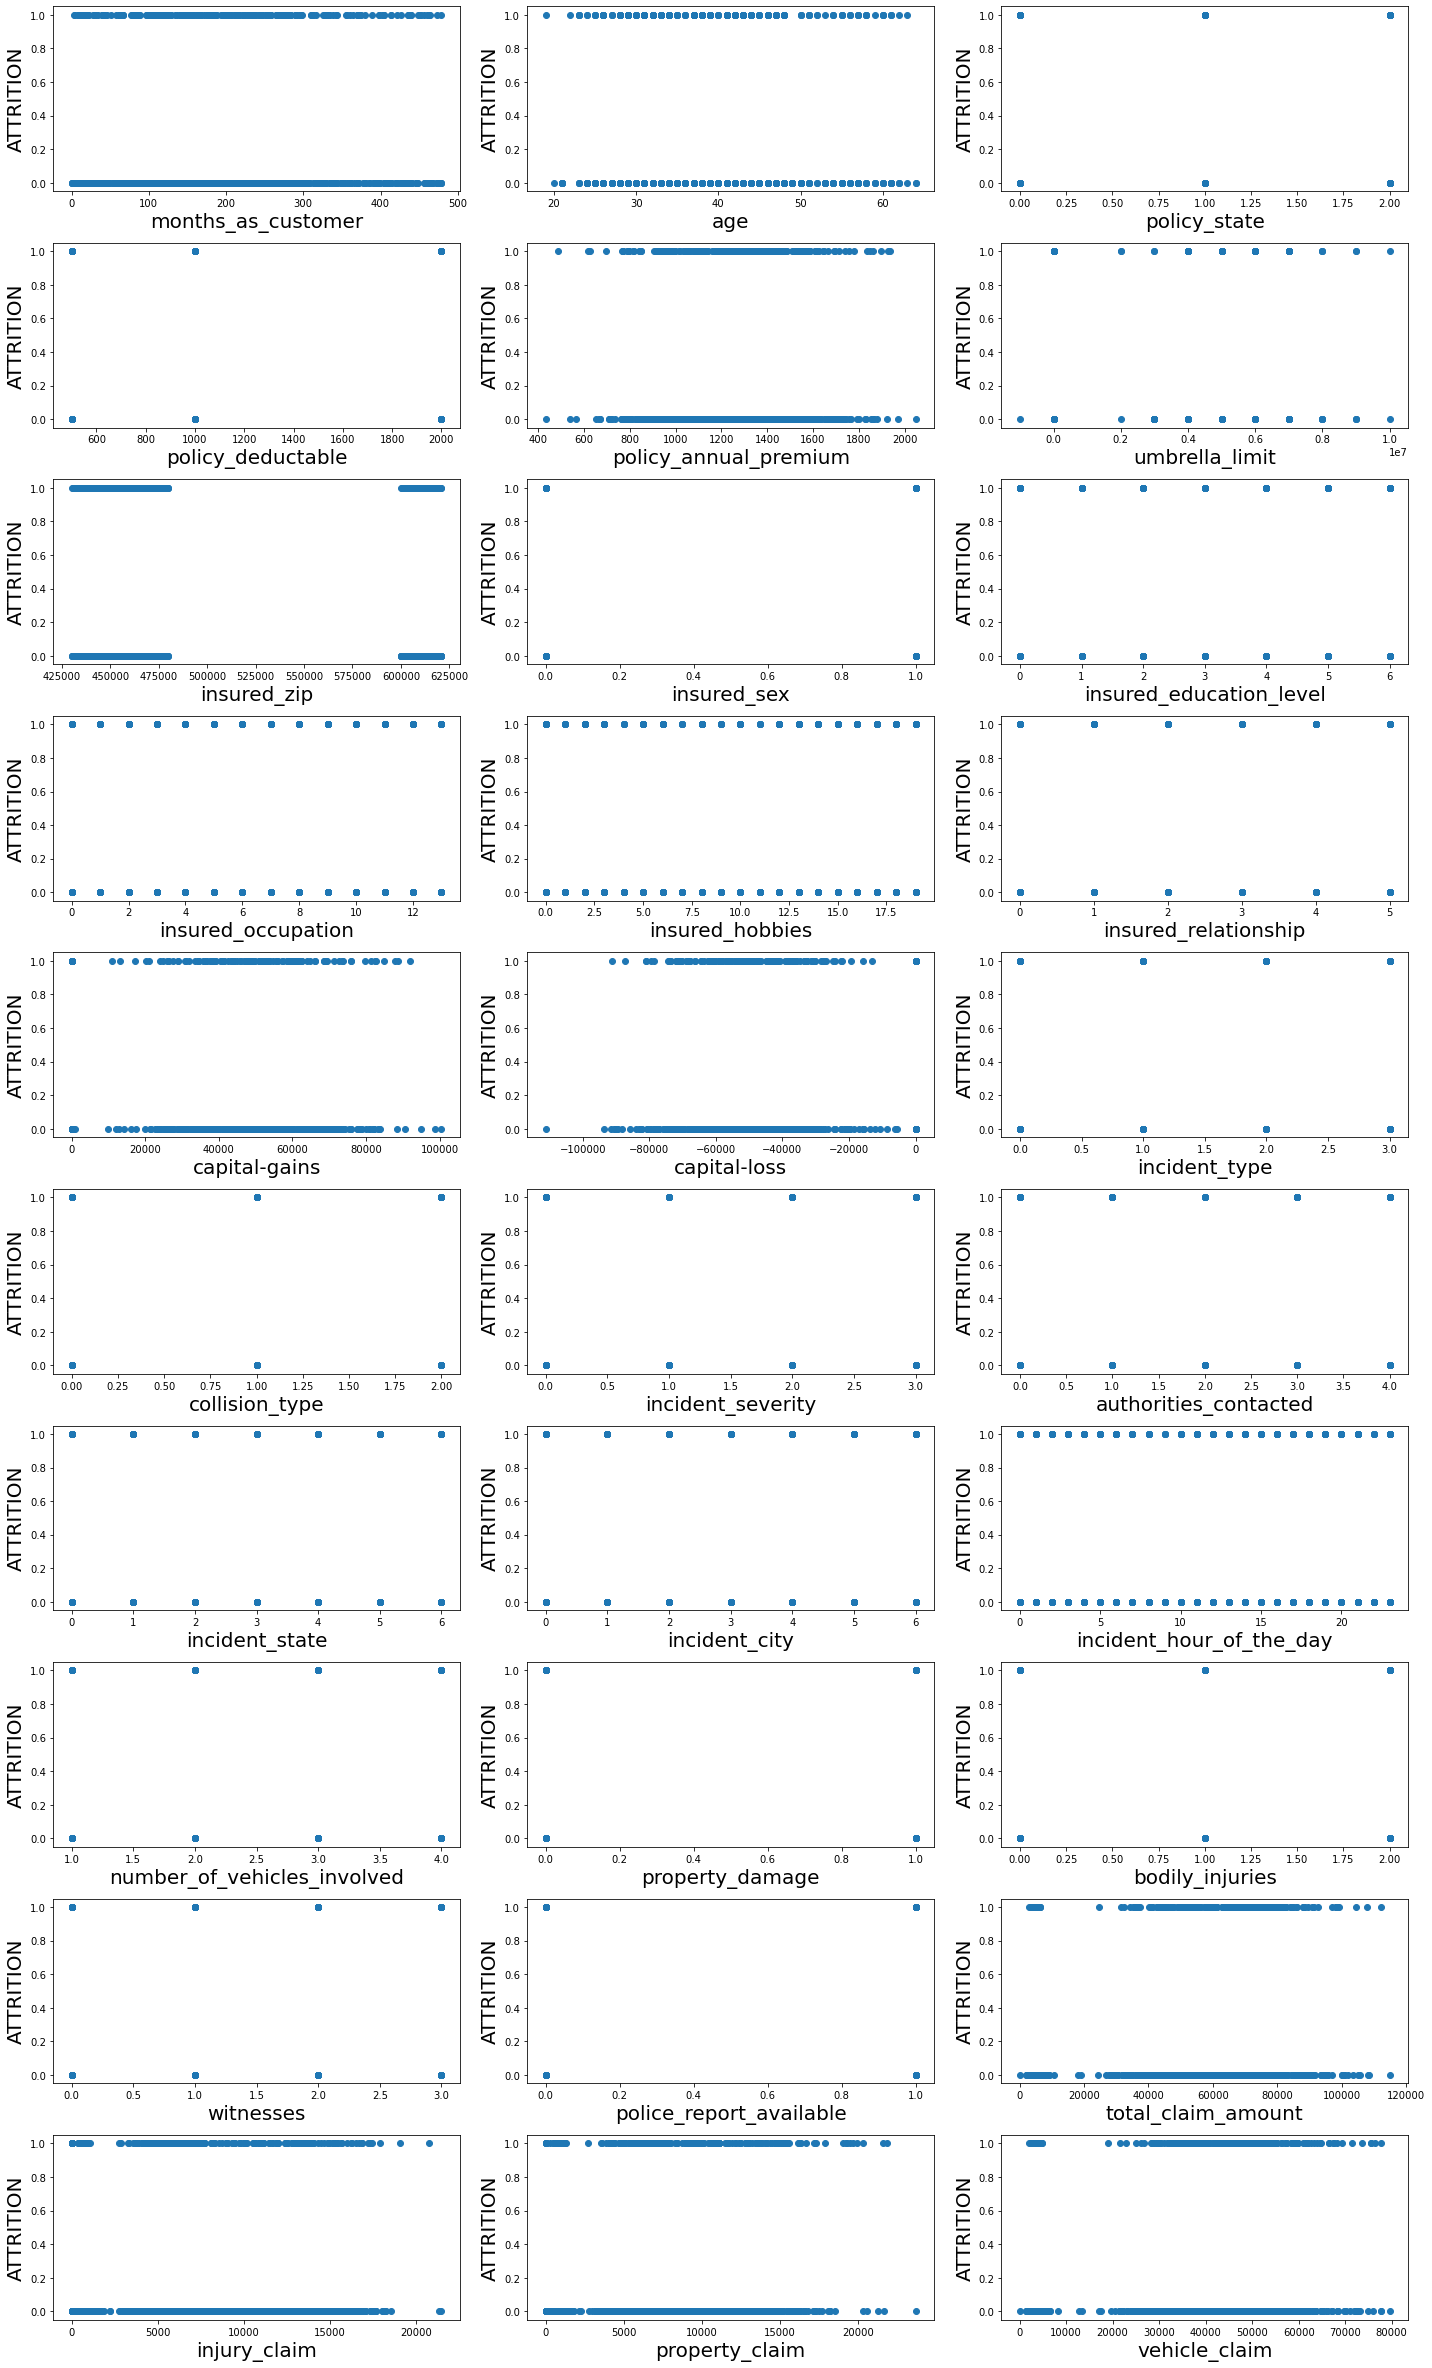

In [283]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
	if plotnumber<=30: 
		ax=plt.subplot(10,3,plotnumber)
		plt.scatter(X[column],y)
		plt.xlabel(column,fontsize=20)
		plt.ylabel('FRAUD REPORTED', fontsize=20)
	plotnumber+=1
plt.tight_layout()

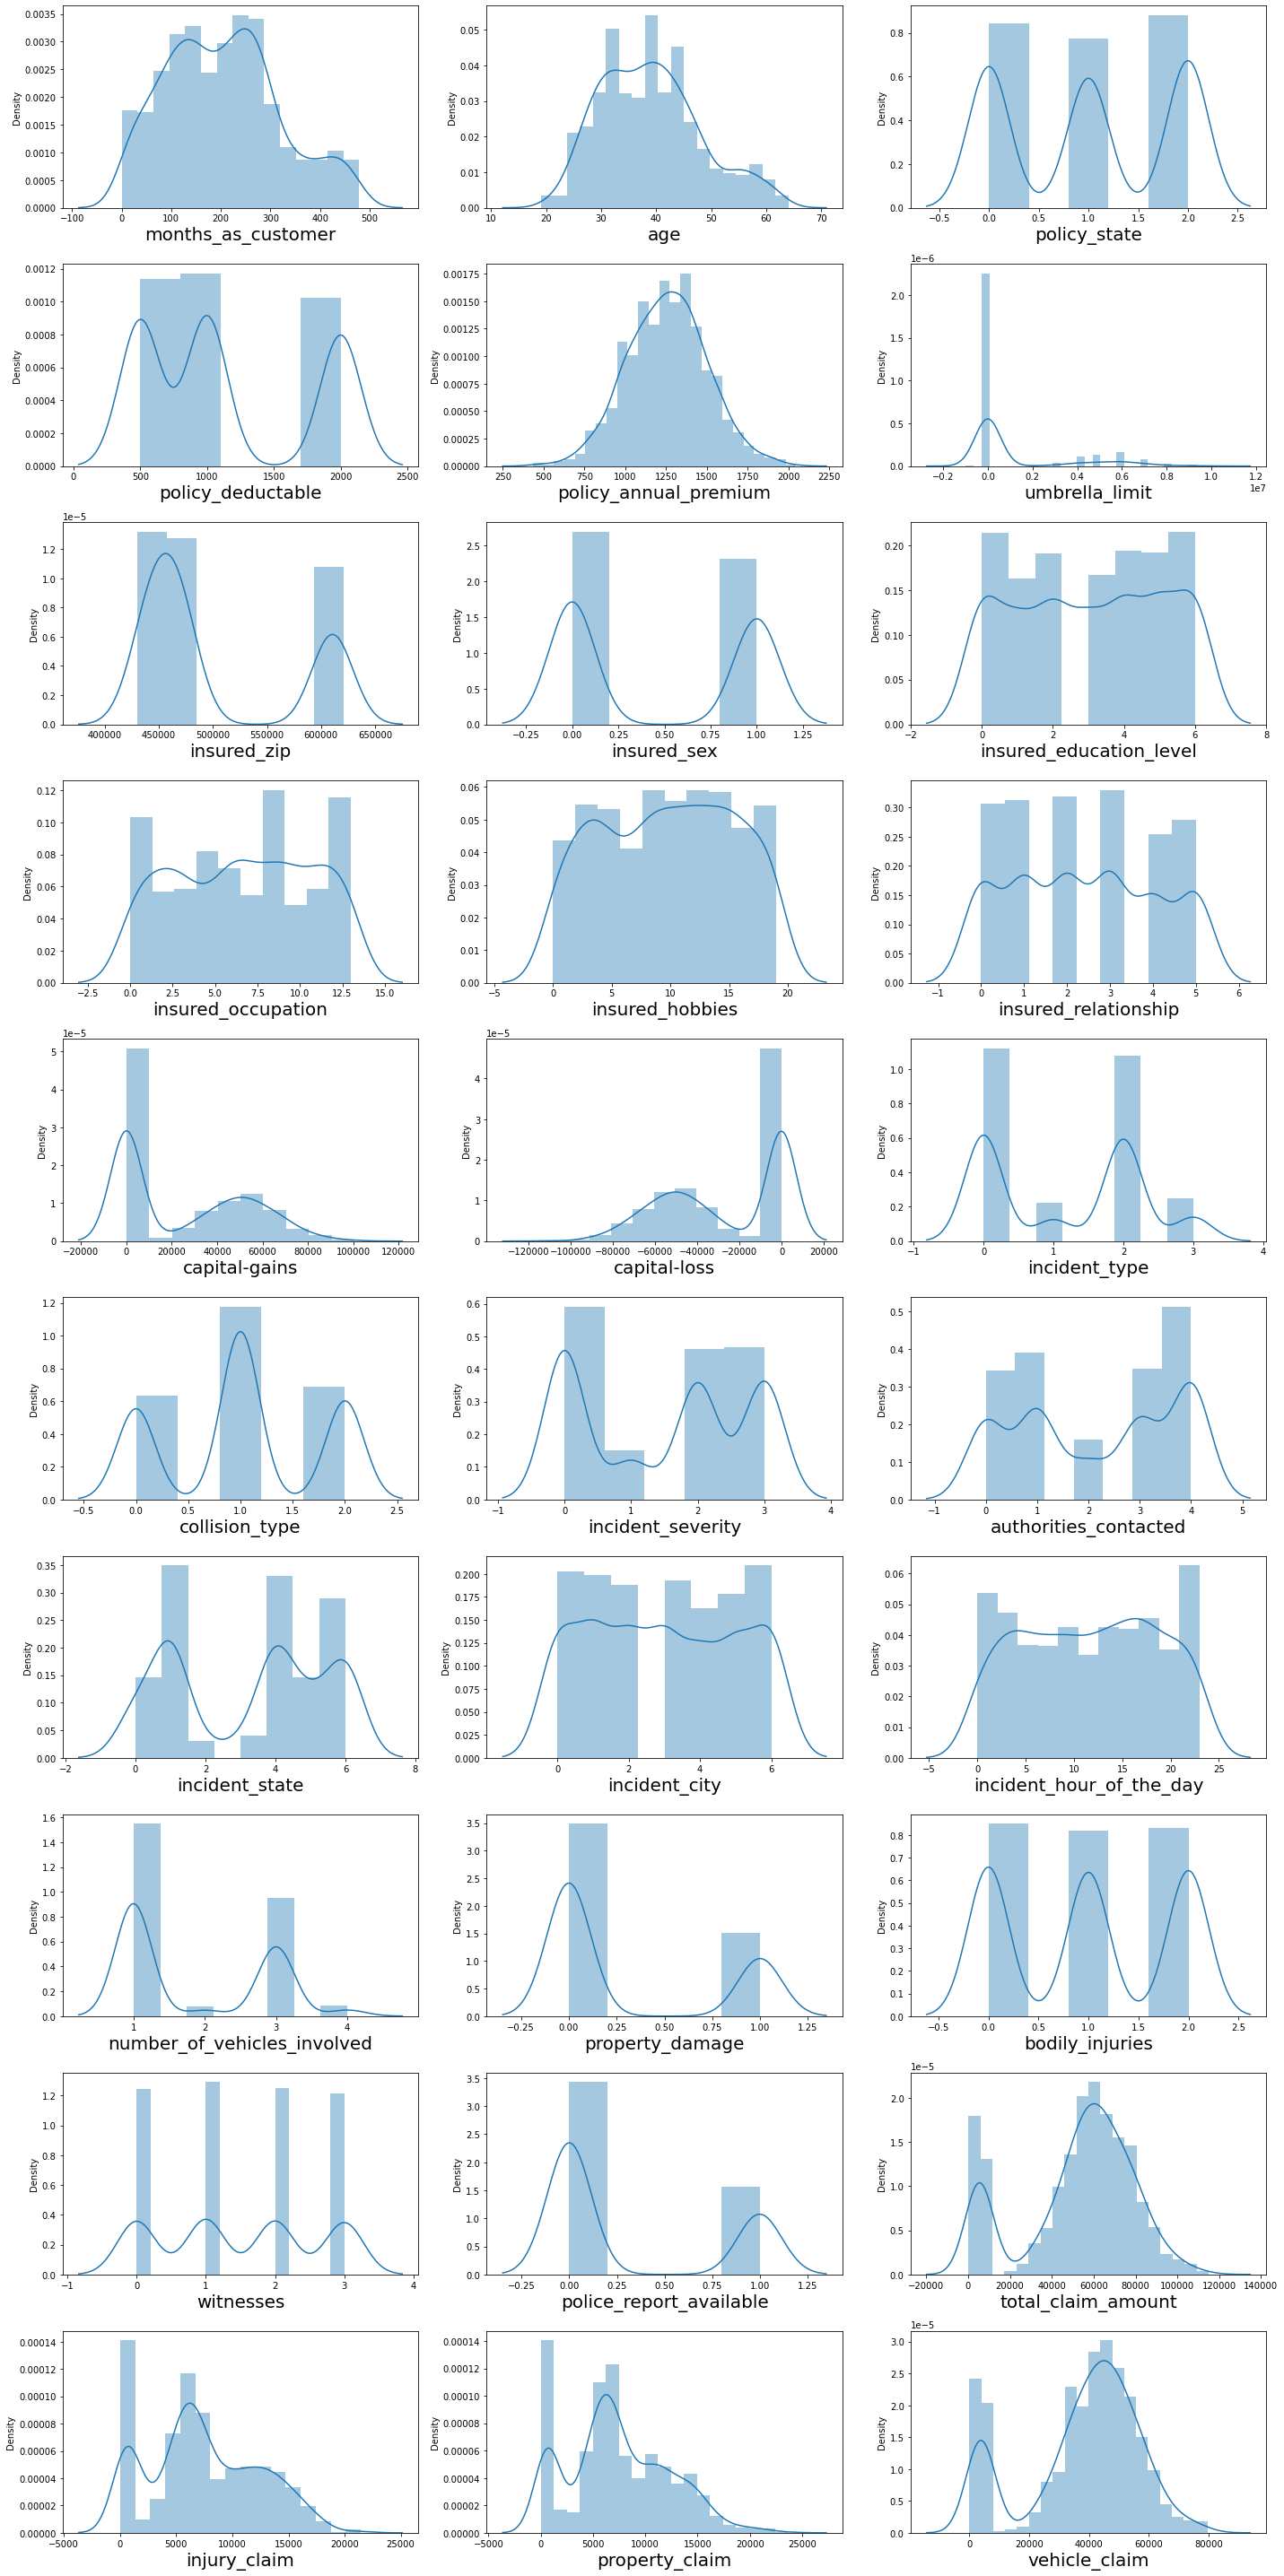

In [284]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [285]:
#Checking skewness of the features
X.skew().sort_values(ascending=False)

umbrella_limit                 1.806712
incident_month                 1.375894
['policy_csl']_500/1000        0.874183
property_damage                0.863806
insured_zip                    0.816554
police_report_available        0.802728
['policy_csl']_100/300         0.634536
['policy_csl']_250/500         0.625306
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
insured_sex                    0.148630
incident_type                  0.101507
insured_relationship           0.077488
incident_day                   0.059111
policy_bind_year               0.052511
incident_city                  0.049531
policy_bind_day                0.024372
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402


umbrella_limit,incident_month,property_damage, insured_zip, policy_report_available
are all skewed
but since they are all categorical values, we will not treat them

In [286]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = power_transform(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

['policy_csl']_500/1000        0.874183
property_damage                0.863806
police_report_available        0.802728
['policy_csl']_100/300         0.634536
['policy_csl']_250/500         0.625306
number_of_vehicles_involved    0.363693
incident_month                 0.306468
insured_sex                    0.148630
capital-loss                   0.090488
capital-gains                  0.038722
policy_bind_year               0.034584
policy_deductable              0.023988
policy_annual_premium          0.004758
insured_zip                    0.000000
age                           -0.001945
auto_year                     -0.012491
incident_type                 -0.088766
bodily_injuries               -0.128799
collision_type                -0.129334
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
insured_relationship          -0.160421
policy_bind_month             -0.171414
incident_city                 -0.181772


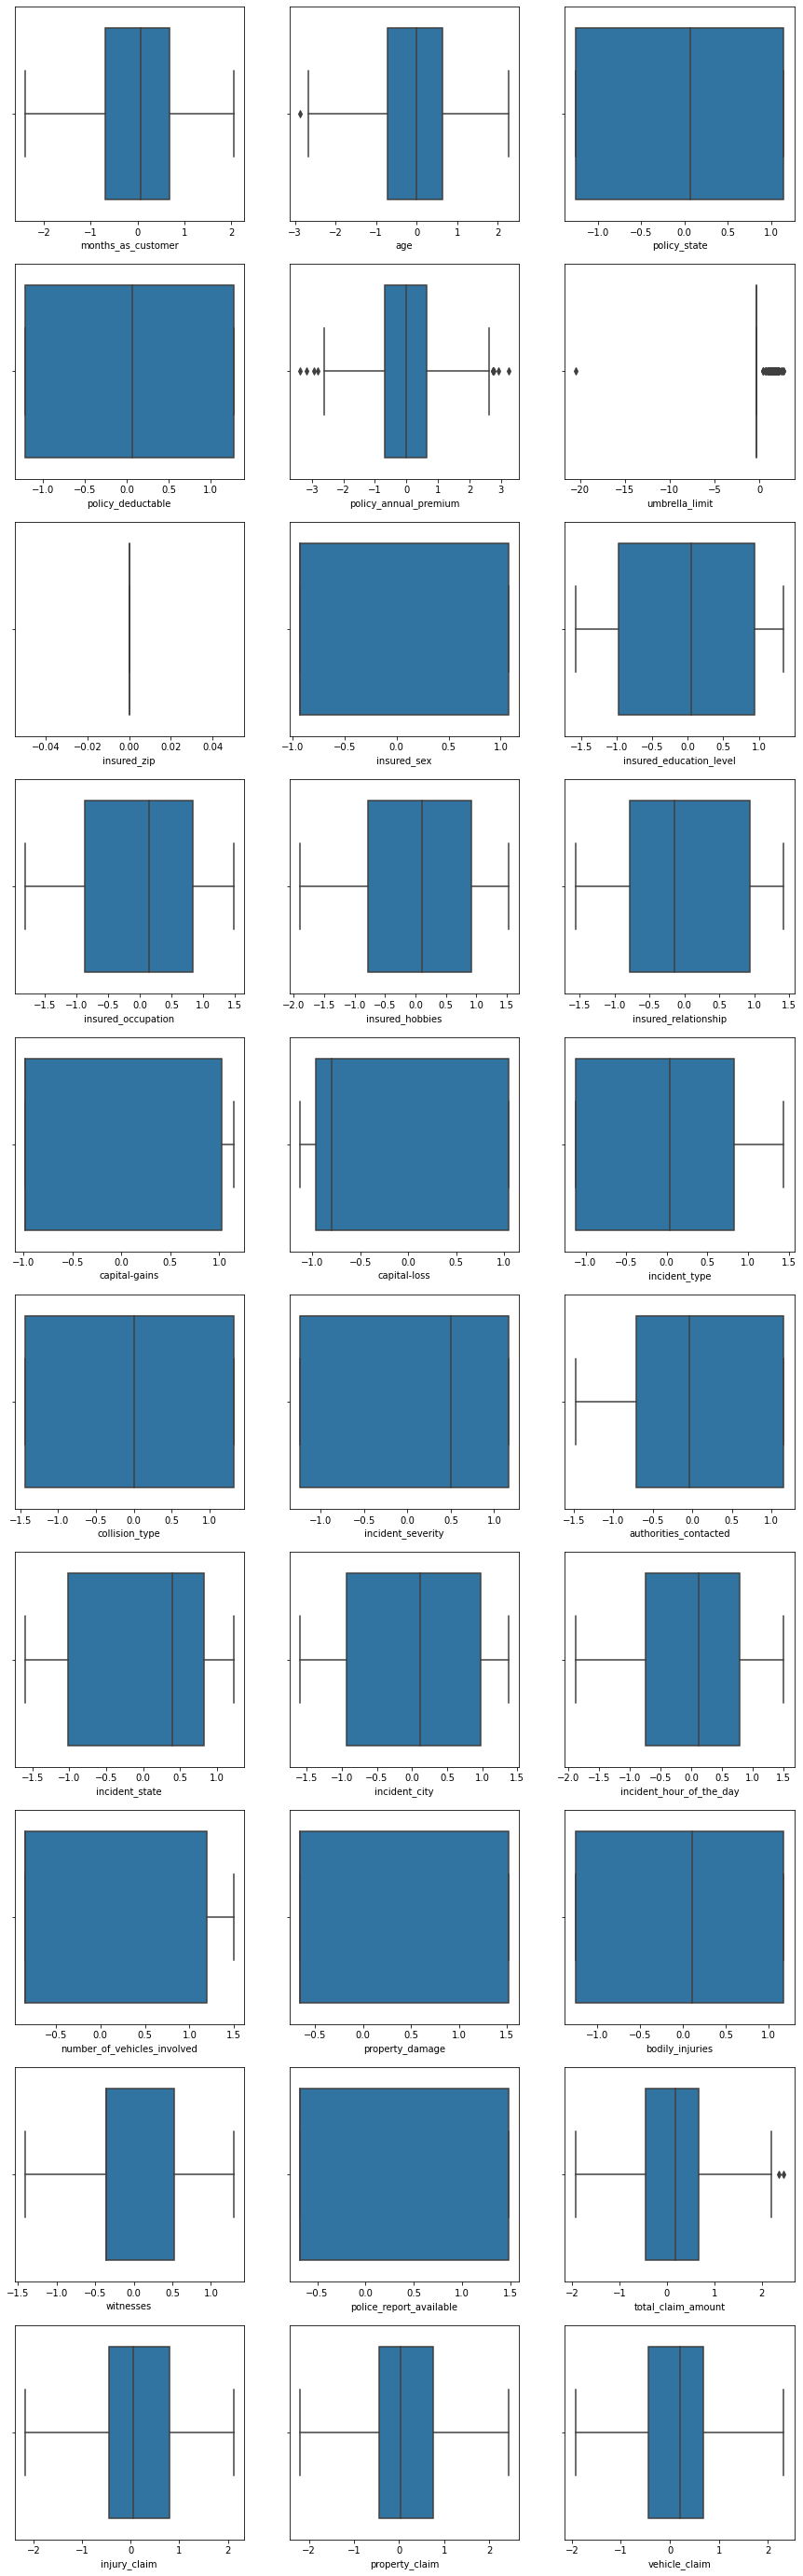

In [287]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
	if graph<=30: 
		ax=plt.subplot(10,3,graph)
		sns.boxplot(X[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [ ]:
#no major outliers seen in the dataset

In [288]:
#Data Scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [289]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
	x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=i)
	LR = LogisticRegression()
	LR.fit(x_train,y_train)
	predrf=LR.predict(x_test)
	acc=accuracy_score(y_test,predrf)
	if acc>maxAccu:
		maxAccu=acc
		maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.83 on Random State 64


In [290]:
#CREATING TRAIN-TEST SPLIT
x_train_imb, x_test, y_train_imb, y_test =  train_test_split(X_scaled, y, test_size=0.10, random_state=64)

In [291]:
print(x_train_imb.shape)
print(y_train_imb.shape)
print(x_test.shape)
print(y_test.shape)

(900, 41)
(900,)
(100, 41)
(100,)


In [292]:
# We will be doing down sampling of the target column which has imblanced class

In [293]:
#USING SMOTE FOR DOWN-SAMPLING

In [294]:
print(y_train_imb.value_counts())

0    676
1    224
Name: fraud_reported, dtype: int64


In [295]:
#y_train has 676 entries of class 0 and only 224 entries of class 1

In [296]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
down_smp=RandomUnderSampler(0.99)
x_train_ns,y_train_ns=down_smp.fit_sample(x_train_imb,y_train_imb)
from collections import Counter
print('The no of samples before fit()', format(Counter(y_train_imb)))
print('The no of samples after fit()', format(Counter(y_train_ns)))

The no of samples before fit() Counter({0: 676, 1: 224})
The no of samples after fit() Counter({0: 226, 1: 224})


In [297]:
print(y_train_ns.value_counts())

0    226
1    224
Name: fraud_reported, dtype: int64


In [298]:
#Now both the classes have 160 and 161 entries and hence we have a balanced class in our training data.

In [299]:
x_train = x_train_ns
y_train = y_train_ns

In [300]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(450, 41)
(450,)
(100, 41)
(100,)


# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL¶

In [301]:
results = pd.DataFrame()
model_name=[]
accuracy=[]
cvs=[]

In [302]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_LR = accuracy_score(y_test,y_pred)*100
scr = cross_val_score(LR,X,y,cv=5)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
model_name.append("Logistic Regression")
accuracy.append(accuracy_LR)
cvs.append(scr.mean())

[[47 30]
 [10 13]]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        77
           1       0.30      0.57      0.39        23

    accuracy                           0.60       100
   macro avg       0.56      0.59      0.55       100
weighted avg       0.70      0.60      0.63       100



In [303]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100
scr2 = cross_val_score(dt,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
model_name.append("Decistion Tree Classifier")
accuracy.append(accuracy_dt)
cvs.append(scr2.mean())

[[54 23]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81        77
           1       0.48      0.91      0.63        23

    accuracy                           0.75       100
   macro avg       0.72      0.81      0.72       100
weighted avg       0.85      0.75      0.77       100



In [304]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)*100
scr3 = cross_val_score(rf,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
model_name.append("Random Forest Classifier")
accuracy.append(accuracy_rf)
cvs.append(scr3.mean())

[[59 18]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        77
           1       0.49      0.74      0.59        23

    accuracy                           0.76       100
   macro avg       0.70      0.75      0.71       100
weighted avg       0.81      0.76      0.77       100



In [305]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test,y_pred_svc)*100
scr4 = cross_val_score(svc,X,y,cv=5)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
model_name.append("SVC")
accuracy.append(accuracy_svc)
cvs.append(scr4.mean())

[[41 36]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.84      0.53      0.65        77
           1       0.29      0.65      0.41        23

    accuracy                           0.56       100
   macro avg       0.57      0.59      0.53       100
weighted avg       0.71      0.56      0.59       100



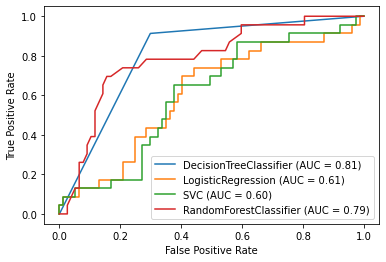

In [306]:
#PLOT THE ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.show()

In [307]:
results['Model Name'] = model_name
results['Accuracy'] = accuracy
results['Cross Value Score'] = cvs
results['ROC AUC'] = ['0.61', '0.81', '0.79', '0.60']
results

,Model Name,Accuracy,Cross Value Score,ROC AUC
0,Logistic Regression,60.0,0.735,0.61
1,Decistion Tree Classifier,75.0,0.767,0.81
2,Random Forest Classifier,76.0,0.746,0.79
3,SVC,56.0,0.753,0.60


In [ ]:
#since decision tree classifier has the best cv score and ROC AUC score, we will continue with this model

In [311]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
grid_param = {
				'criterion':['gini','entropy'],
				'max_depth':range(10,15),
				'min_samples_leaf':range(2,10),
				'min_samples_split':range(3,10),
				'max_leaf_nodes':range(2,4)
			 }

grid_search = GridSearchCV(estimator = dt, param_grid=grid_param,cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [312]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=3,min_samples_split=3,max_depth=10,min_samples_leaf=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.81

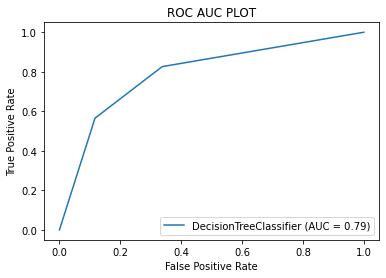

In [313]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf,x_test,y_test)
plt.title("ROC AUC PLOT")
plt.show()

In [ ]:
#Post GridSearchCV Decision tree classifier gives an accuracy of 0.81 and ROC AUC value of 0.79

# SAVE THE MODEL

In [314]:
import joblib
joblib.dump(clf,'Insurance_Claims_Fraud_Detection.obj')

['Insurance_Claims_Fraud_Detection.obj']